# 1.Multi Armed Bandits

### 1.1 Теоретическая задача

Epsilon-greedy algorithm with exploration probabilities $\varepsilon = t^{-1/3} \cdot (K \log t)^{1/3}$

achieves regret bound $\mathbb{E} R(t) \leq t^{2/3} \cdot O(K \log t)^{1/3}$ for each round $t$.

[см.](https://arxiv.org/pdf/1904.07272) Theorem 1.6 & Algorithm 1.2


Регрет растет не только тогда, когда мы выбираем при исследовании рандомную ручку, но и еще если при использовании мы дергаем не лучшую ручку в силу недостаточной уверенности в ней(те мы недостаточно много исследовали). Тогда ожидаемое количество исследовательных шагов: 

$$E(N_{explore}(t)) = \sum_{s = 1}^{t} \varepsilon = \int_1^t t^{-1/3} \cdot (K \log t)^{1/3} dt = (*)$$

Первый множетель интегрируется сразу, а второй(логарифм) растет достаточно медленно, так что его можно вынести в приближение, туда же константа 3/2 от первого множетеля. 

$$ (*) \approx (K \log t)^{1/3} \cdot \int_1^t t^{-1/3} dt \approx O(t^{2/3} \cdot (K \log t)^{1/3})$$

То есть среднее число исследовательских шагов можно оценить как $E(N_{explore}) \approx O(t^{2/3} \cdot (K \log t)^{1/3})$, при этом зазор на каждом из таких шагов тоже можно оценить средним и средний зазор не зависит от t, потому что это среднее арифметическое зазоров на каждой ручке, а они просто разность выигрыша от данной ручки и лучшей. 

Так что $E(R_{explore}(t)) = \bar{\Delta} E(N_{explore}(t)) = O(1) О(\cdot t^{2/3} \cdot (K \log t)^{1/3}) = О(t^{2/3} \cdot (K \log t)^{1/3})$

$E(R_{exploit}(t)) << E(R_{explore}(t))$ так что можно пренебреч.

Итого $E(R(t)) = E(R_{explore}(t)) + E(R_{exploit}(t)) \approx E(R_{explore}(t)) \approx О(t^{2/3} \cdot (K \log t)^{1/3})$

### 1.2 Теоретическая задача

Take UCB bandit algorithm $A$ for fixed time horizon $T$ . Convert it to an algorithm $A_{\infty}$ which runs forever, in phases $i = 1, 2, 3, ...$ of $2^i$ rounds each.

In each phase $i$ algorithm $A$ is restarted and run with time horizon $2^i$.

State and prove a theorem which converts an instance-independent upper bound on regret for $A$ into similar bound for $A_{\infty}$.

[см.](https://arxiv.org/pdf/1904.07272) Chapter 1 & Algorithm 1.5

$\bold{Теорема:}$ Если регрет алгоритма А на фиксированом горизонте Т ограничен некоторой функцией от Т,

те $R(T) \leq O(f(T))$, то этот же алгоритм на бесконечности с фазами $2^i$ и перезапуском в начале каждой фазы будет выдавать регрет равный асмптотике $R_{\infty}(T) = O(f(T))$. 

Доказательство: Нам предлагают рассмотреть UCB, но не с фиксированым горизонтом действий, а с бесконечным, но разбитым на эпохи длиной $2^i$. Для UCB с фиксированым горизонтом сожаление $R(T)$ ограничено сверху некоторой функией от Т, те $R(T) \leq f(T)$. Тогда если рассмотреть эпоху $T = 2^i$, то сожаление на ней будет ограничено вот так: $R(T) \leq f(2^i)$. 

Тогда общее сожаление $R_{\infty} = O(\sum_{i = 1}^{\infty} f(2^i))$

Рассмотрим ограничение на регрет для UCB, которое фигурировало в статье: $R(T) \leq O(T^{2/3} (logT)^{1/3})$

Для $T = 2^i$ получаем: $R(2^i) \leq O(2^{2i/3} \cdot i^{1/3})$

Но в каждой новой эпохе регрет обнуляется, а не накапливается, так что правильнее будет рассматривать нормированый регрет. 

$R(A_{\infty}) = O(\sum_{i = 1}^{\infty} \frac{R(2^i)}{2^i}) = \sum_{i = 1}^{\infty} O(\frac{4^{i/3} \cdot i^{1/3}}{2^i}) = \sum_{i = 1}^{\infty} O(2^{-i/3} \cdot i^{1/3})$


Воспользуемся признаком Даламбера: 
$$ \lim_{i \to \infty} \frac{a_{i+1}}{a_i} = \lim_{i \to \infty} \frac{2^{-(i+1)/3} \cdot (i+1)^{1/3}}{2^{-i/3} \cdot i^{1/3}} = \lim_{i \to \infty} (1/2)^{1/3} \cdot \left(\frac{i+1}{i}\right)^{1/3} = (1/2)^{1/3} \cdot 1 < 1$$
Значит сумма сходится.

Поскольку сумма сходится, это означает что совокупный регрет $R_{\infty}(T)$ остается ограниченным с тем же порядком, что и $R(T)$. Следовательно алгоритм $A_{\infty}$ несмотря на бесконечный временной горизонт, сохраняет тот же порядок регрета, что и исходный алгоритм А. 

### 1.3 Практическая задача

На первом семинаре разбирали метод $\varepsilon$ - greedy.

В этом задании предстоит дополнить MAB методом UCB в рамках того же класса MAB, что и рассматривали в семинаре.

Для определенности алгоритм можно посмотреть здесь **[см.](https://arxiv.org/pdf/1904.07272) Chapter 1 & Algorithm 1.5**

$UCB_i(t) = \sqrt{\frac{\delta \ln (T)}{t_i}}$

$\delta$ - параметр исследования, подберите самостоятельно

$T$ - временной горизонт

$t_i$ - сколько раз дергали ручку $i$ до шага $t$



In [14]:
"""
В ЭТОЙ ЯЧЕЙКЕ НИЧЕГО МЕНЯТЬ НЕ НУЖНО

"""

import numpy as np
from abc import ABC, abstractmethod

class MAB(ABC):
    """Base class for multi-armed bandit (MAB)

    Parameters
    ----------
    n_arms : int
        Number of arms.
    """
    # initialise
    def __init__(self, n_arms):
        self.n_arms = n_arms

    @abstractmethod
    def play(self):
        """Play a round

        Returns
        -------
        arm : int
            Integer index of the arm played this round. Should be in the set
            {0, ..., n_arms - 1}.
        """
        pass

    @abstractmethod
    def update(self, arm, reward):
        """Update the internal state of the MAB after a play

        Parameters
        ----------
        arm : int
            Integer index of the played arm in the set {0, ..., n_arms - 1}.

        reward : float
            Reward received from the arm.

        """
        self.arm = arm
        self.reward = reward


def offlineEvaluate(mab, true_bandit_probs, n_arms, n_rounds= 100000):
    """Offline evaluation of a multi-armed bandit

    Parameters
    ----------
    mab : instance of MAB
        MAB to evaluate.

    n_arms : int
        Number of arms.

    true_bandit_probs : float numpy.ndarray, shape (n_events,)
        Array containing the history of rewards.


    n_rounds : int, default=None
        Number of matching events to evaluate the MAB on.

    Returns
    -------
    R : float numpy.ndarray
        Rewards for the matching events.

    H : int numpy.ndarray
        Historical events
    """

    R = []          # save the total payoff
    H = np.zeros((n_rounds, n_arms)) # save used historical events

    for i in range(n_rounds):
        arm = mab.play()
        reward = np.random.rand() < true_bandit_probs[arm]

        R.append(reward)  # append the new rewards
        H[i, arm] = 1     # append the used events

        mab.update(arm, reward) # update the information

    return np.array(R), np.array(H)

In [15]:
"""
реализуем класс UCB по аналогии с EpsGreedy(MAB) первого семинара

необходимые каунтеры можете использовать такие же как в EpsGreedy или завести свои

"""

class UCB(MAB):
    """UCB multi-armed bandit

    Parameters
    ----------

    """
    # initialise values
    def __init__(self, n_arms, delta, param):
        super().__init__(n_arms)
        self.param = param
        self.value = np.zeros(self.n_arms)
        self.count = np.zeros(self.n_arms)
        self.delta = delta



    # select a random arm to explore or a arm with best rewards to exploit, then return the arm
    def play(self): #, context=None):
        super().play()
            
        for arm in range(self.n_arms):
            if self.count[arm] == 0:
                return arm

        ucb_values = np.zeros(self.n_arms)
        total_count = np.sum(self.count)

        for i in range(self.n_arms):
            explore = np.sqrt(self.delta * np.log(total_count) / self.count[i])
            ucb_values[i] = self.value[i] / self.count[i] + explore
        return int(np.argmax(ucb_values))

    def update(self, arm, reward):
        super().update(arm, reward)

        self.value[arm] += reward
        self.count[arm] += 1

In [5]:
"""
Заведем бандита с 4 ручками и распределением выигрышей ручек [0.45, 0.35, 0.85, 0.62]

На временном горизонте 100000

Подбираем параметр исследования (delta), который согласуется с теоретическим в оценке регрета

"""
n_arms = 4
n_iterations = 100000
true_bandit_probs =[0.45, 0.35, 0.85, 0.62]
param = 1
delta = 2

In [16]:
"""
В ЭТОЙ ЯЧЕЙКЕ НИЧЕГО МЕНЯТЬ НЕ НУЖНО

запускаем процесс

"""
mab = UCB(n_arms, delta, param)
results_UCB, history_UCB = offlineEvaluate(mab, true_bandit_probs, n_arms, n_iterations)
print('UCB average reward', np.mean(results_UCB))

UCB average reward 0.84814


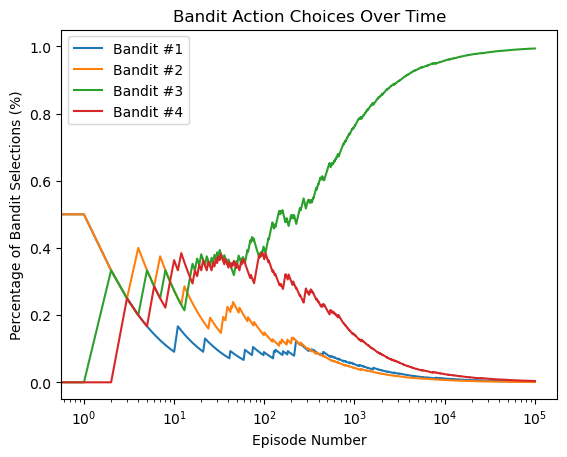

Bandit #1 -> 0.45
Bandit #2 -> 0.35
Bandit #3 -> 0.85
Bandit #4 -> 0.62


In [17]:
"""
В ЭТОЙ ЯЧЕЙКЕ НИЧЕГО МЕНЯТЬ НЕ НУЖНО

посмотрим на динамику выбора ручек
"""

selections_percentage = np.cumsum(history_UCB, axis=0) / np.arange(1, n_iterations + 1).reshape(-1, 1)

import matplotlib.pyplot as plt
for arm in range(n_arms):
    plt.plot(selections_percentage[:, arm], label=f'Bandit #{arm+1}')
plt.xscale('log')
plt.title('Bandit Action Choices Over Time')
plt.xlabel('Episode Number')
plt.ylabel('Percentage of Bandit Selections (%)')
plt.legend()
plt.show()
for i, prob in enumerate(true_bandit_probs, 1):
    print(f"Bandit #{i} -> {prob:.2f}")

# 2.Expert Advice.


###2.1 Теоретическая задача

Sequences of outcomes on which many experts suffer a small loss are
intuitively easier to predict. Show that the **exponentially weighted forecaster** satistifies the following property: for every $n$, for every outcome sequence $y_n$ , and for all $L > 0$,
$$\hat L_n ≤ L + \frac{1}{\mu}\ln\frac{N}{N_L} + \frac{\mu}{8}n$$
where $N_L$ is the cardinality of the set $\{1 \leq i \leq N : L_{i,n} \leq L\}$
### --------------------------------------------------------------------------------------------------------------------------------------------------

Exponentially Weighted Forecaster based on the
potential $\Phi_{\mu}(\mathbf{u})= \frac{1}{\mu} \ln(\sum_{i=1}^N e^{\mu u_i}) $ where $\mu>0$.

$N$ - number of experts.

$n$ - number of times.

$L_{i, n} = \sum_{t=1}^n\ell(f_{i, t}, y_t)$ - cumulative loss of expert $i$

 $\hat L_{n} = \sum_{t=1}^n \ell(\hat p_t, y_t)$ - cumulative loss of forecaster.

**[см ](https://ece.iisc.ac.in/~aditya/Prediction_Learning_and_Games.pdf)Corollary 2.2.**

Рассмотрим сначала 0-е положение: 

$W_0 = N$, $\Phi_\mu(0) = \frac{1}{\mu} ln(\sum_{i=1}^{N} e^{\mu \cdot 0}) = \frac{ln(N)}{\mu}$

$\Phi_\mu(L_t) = \frac{1}{\mu} ln(\sum_{i=1}^{N} e^{\mu L_{i,t}})$

$L_{i,t+1} = L_{i, t} + l(f_{i, t+1}, y_{t+1})$

$\Phi_\mu(L_{t+1}) = \frac{1}{\mu} ln(\sum_{i=1}^{N} e^{\mu L_{i,t+1}})$

В нашем случае $\phi(x) = e^{\mu x}$ $\psi(x) = \frac{1}{\mu} \ln x$

Учитывая что $\Phi_\mu(0) = \frac{ln(N)}{\mu}$ и применив теорему 2.1 получаем:

$$ \max_{i=1,...,N} R_{i,n} \leq \Phi_\mu(R_n) \leq \Phi_\mu(0) + \frac{1}{2} \sum_{t=1}^{n} C(r_t) = \frac{\ln N}{\mu} +  \frac{\mu}{8}n$$

Учтя, что нам нужно рассмотреть экспертов, лосс которых лучше некоторого порога получаем:

$$ \hat L_n - L \leq \Phi_\mu(R_n) \leq \Phi_\mu(0) + \frac{1}{2} \sum_{t=1}^{n} C(r_t) = \frac{1}{\mu} \ln \frac{N}{N_L} +  \frac{\mu}{8}n$$

### 2.2 Практическая задача

В этом задании предстоит реализовать exponentially weighted forecaster  по аналогии с polynomially-weighted forecaster второго семинара. И сравнить теоретический и реализованный регреты.

Нужно определить потенциальную функцию и лосс, подсчитать реализованный и теоретический регреты.

**param** выступает в роли параметра метода. Для polynomially-weighted forecaster параметр отвечал за значение степени нормы $p$. Для exponentially weighted forecaster параметр отвечает за $\mu$.

Параметр $\mu$ подберите самостоятельно.

В res функции **step** записываются необходимые результаты для подсчета реализованного регрета


In [3]:
"""
В ЭТОЙ ЯЧЕЙКЕ НИЧЕГО МЕНЯТЬ НЕ НУЖНО

"""
import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import numpy as np

import jax
from functools import partial


@partial(jax.vmap, in_axes=(0, 0, None), out_axes=-1)
def _create_mistakes(key, p, T):
    mistakes = jax.random.bernoulli(key, p=p, shape=(T,))
    return mistakes


def bern_oracle_beta_forecasters(key, n_experts, n_timesteps, a_fcst=2, b_fsct=7, p_oracle=0.5):
    """
    Create a set of forecasters whose probability of being correct is
    distributed according to a Beta(a_fcst, b_fcst) distribution.
    The oracle is a Bernoulli random variable with p=p_oracle.
    """
    key_oracle, key_noise, key_errs = jax.random.split(key, 3)
    keys_noise = jax.random.split(key_noise, n_experts)

    oracle = jax.random.bernoulli(key_oracle, p=p_oracle, shape=(n_timesteps,))
    ps_mistakes = jax.random.beta(key_errs, a=a_fcst, b=b_fsct, shape=(n_experts,))

    mistakes = _create_mistakes(keys_noise, ps_mistakes, n_timesteps)
    experts = (mistakes ^ oracle[:, None]).astype(float)

    return oracle, experts



def forecast_step(experts_curr, regret_prev, param):
    weights = gradp(regret_prev, param)
    forecast = weights @ experts_curr / weights.sum()
    return weights, forecast


def step(regret, xs, param):
    """
    At time t, we make a prediction based on the
    regret (as defined by the potential) obtained at time
    t-1 and the prediction of each forecaster at time t.

    After making a new prediction, we update the regret.
    """
    experts, oracle = xs
    weights, forecast = forecast_step(experts, regret, param)

    loss_forecaster = loss(forecast, oracle)
    loss_experts = loss(experts, oracle)

    iregret_experts = loss_forecaster - loss_experts

    regret_new = regret + iregret_experts

    res = {
        "weights": weights,
        "forecast": forecast,
        "step-loss-experts": loss_experts,
        "step-loss-forecaster": loss_forecaster,
    }


    return regret_new, res

In [4]:
"""

Определим лосс и потенциал для экспотенциального взвешивания

"""

def loss(yhat, y):
    return (yhat - y)**2

def potential(x, param):
    return (1 / param) * jnp.log(jnp.sum(jnp.exp(param * x)))  

def gradp(x, param):
    exp_vals = jnp.exp(param * x)
    return exp_vals / jnp.sum(exp_vals)


In [14]:
"""
генерим ответы природы (oracle) ~ Bernoulli(0.7) и ошибки 10 экспертов (experts) ~  Beta(3,3)
c помощью bern_oracle_beta_forecasters()

подбираем временной горизонт

"""

key = jax.random.PRNGKey(314)

param = 0.5

n_experts = 1000
n_timesteps = 10000
a, b =  3, 3 #параметры распределения Beta
p_oracle = 0.7 #параметры распределения  Bernoulli


oracle, experts = bern_oracle_beta_forecasters(key, n_experts, n_timesteps, a, b, p_oracle)

In [15]:
"""
В ЭТОЙ ЯЧЕЙКЕ НИЧЕГО МЕНЯТЬ НЕ НУЖНО

запускаем процесс
"""

regret = jnp.ones(n_experts) #инициализация весов(соответственно регрета) экспертов

xs = (experts, oracle)

part_step = partial(step, param=param)
#скользим по xs и получаем res для каждого шага (количество шагов - длина oracle)
_, res = jax.lax.scan(part_step, regret, xs)

Text(0.5, 1.0, 'Regret vs Upper Bound Regret')

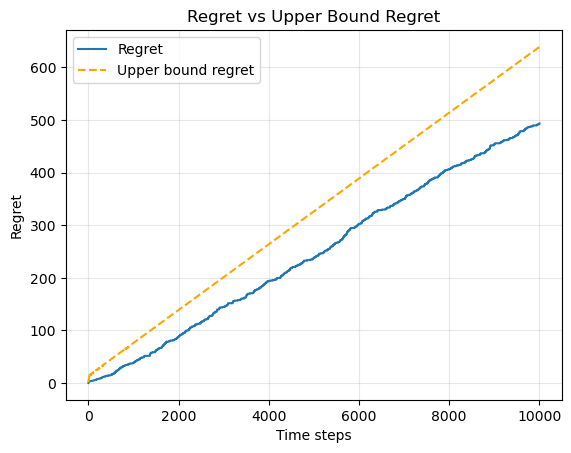

In [16]:
L_experts = res["step-loss-experts"].cumsum(axis=0)
L_expert_min = L_experts.min(axis=1)
L_forecaster = res["step-loss-forecaster"].cumsum()

regret_forecaster = L_forecaster - L_expert_min

N_L = np.sum(np.isclose(L_experts, L_expert_min[:, None], atol=1e-8), axis=1)

L_forecaster = res["step-loss-forecaster"].cumsum()

regret_forecaster = L_forecaster - L_expert_min

timesteps = np.arange(1, n_timesteps + 1)
regret_ubound = (1/param) * np.log(n_experts / N_L) + (param/8) * timesteps



best_experts_loss = jnp.mean(jnp.sort(res["step-loss-experts"], axis=-1)[:, :5], axis=-1)  # Усредняем 5 лучших экспертов
regret_forecaster = jnp.cumsum(res["step-loss-forecaster"] - best_experts_loss)

plt.plot(regret_forecaster, label="Regret")
plt.plot(regret_ubound, label="Upper bound regret", color="orange", linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.xlabel("Time steps")
plt.ylabel("Regret")
plt.title("Regret vs Upper Bound Regret")